In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

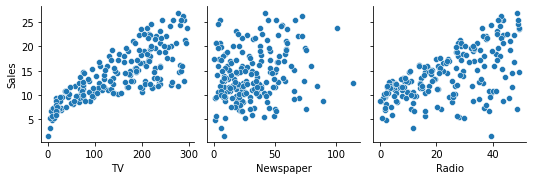

In [17]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

<AxesSubplot:>

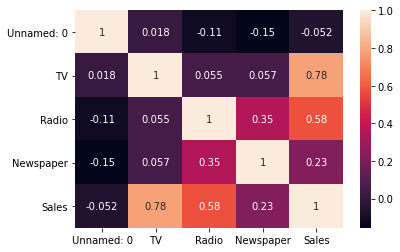

In [18]:
sns.heatmap(df.corr(),annot=True)

In [20]:
X = df.drop('Sales', axis=1)
X = X.drop(columns='Unnamed: 0')

In [22]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
Y = df[['Sales']]
Y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr


LinearRegression()

In [27]:
lr.fit(X_train, Y_train)

LinearRegression()

In [29]:
Y_predict = lr.predict(X_test)

In [30]:
Y_predict

array([[10.05739563],
       [ 7.4522807 ],
       [ 7.0197076 ],
       [24.08029725],
       [12.01786259],
       [ 6.53793858],
       [12.78286918],
       [15.10974587],
       [10.76974013],
       [16.34357951],
       [22.88297477],
       [ 9.12924467],
       [10.46455672],
       [15.48743552],
       [11.58555633],
       [12.17296914],
       [18.76551502],
       [10.78318566],
       [15.90515992],
       [17.30651279],
       [24.06692057],
       [ 9.59834224],
       [15.13512211],
       [12.38591525],
       [ 5.71360885],
       [15.24749314],
       [12.29402334],
       [20.9421167 ],
       [13.40991558],
       [ 9.04348832],
       [12.89239415],
       [21.40272028],
       [18.13802209],
       [21.17320803],
       [ 6.56974433],
       [ 6.14114206],
       [ 7.89018394],
       [13.01541434],
       [14.68953791],
       [ 6.18835143]])

In [33]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(Y_predict,Y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_predict,Y_test)))
print('R-Squared',metrics.r2_score(Y_predict,Y_test))


MAE: 1.3617813502090275
RMSE: 2.0981225634956804
R-Squared 0.8330284237692488


In [36]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)


0.8601145185017868

In [41]:
s=lr.predict([[230.1,37.8,69.2]])


In [38]:
s

array([[20.48878664]])